## Predicting Fish Species based on 6 features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

# Pandas library is used for importing various file types e.g. csv, excel, json.
# also used for manipulation and cleaning dataframes.

# Numpy library has functions used for working with arrays and matrices
# faster, clearer and better quality code using Numpy

# Matplotlib is a 2D plotting library for visualising data in Python

# Seaborn is used for improving Matplotlib visualisations to make them more visually attractive.
# It builds on top of MatPlotLib and works with Pandas for data structures

# SKLearn (formerly called SciKitLearn) is one of the most useful libraries for ML (Machine Learning)
# It contains tools for statistical modelling including classification, regression, clustering and dimensionality reduction.
# It is built on top of Numpy, Scipy and Matplotlib

# KMeans is a clustering method that separates data into clusters with observations belonging to the cluster with
# the nearest mean on a Euclidean scale. In Python it is a module used within the library SKLearn.

In [2]:
data = pd.read_csv('Fish.csv')
# importing dataset
# dataset from:
'https://www.kaggle.com/aungpyaeap/fish-market'

'https://www.kaggle.com/aungpyaeap/fish-market'

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Plotting the data looking at just height and width

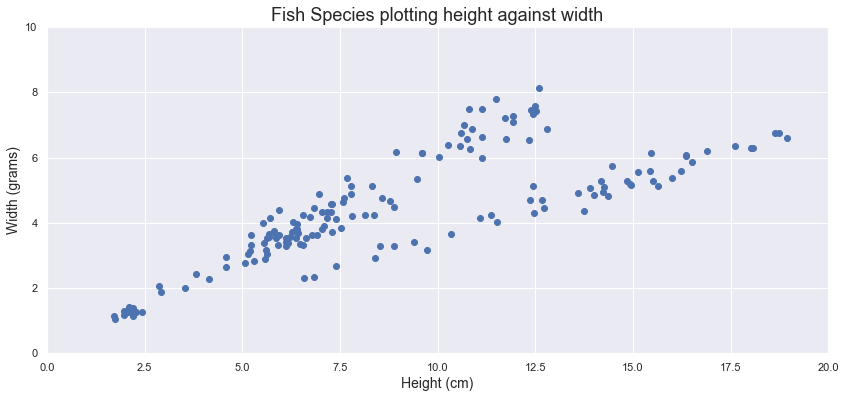

In [28]:
plt.figure(figsize = (14, 6))
plt.scatter(data['Height'], data['Width'])
plt.title('Fish Species plotting height against width', fontsize = 18)
plt.xlabel('Height (cm)', fontsize = 14)
plt.ylabel('Width (grams)', fontsize = 14)
plt.xlim(0, 20)
plt.ylim(0, 10)
plt.show()

# looking at the height and width of the fish individuals

In [5]:
x = data.iloc[:,5:7]
# selecting particular columns from the dataset (height and width)

In [6]:
x

,Height,Width
0,11.5200,4.0200
1,12.4800,4.3056
2,12.3778,4.6961
3,12.7300,4.4555
4,12.4440,5.1340
...,...,...
154,2.0904,1.3936
155,2.4300,1.2690
156,2.2770,1.2558
157,2.8728,2.0672


## Clustering

In [7]:
kmeans = KMeans(2)

# using the kmeans module within the sklearn library to make 2 clusters

In [8]:
kmeans.fit(x)

# fitting the 2 features (columns - height and width) to the kmeans module

KMeans(n_clusters=2)

## Clustering Results

In [9]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

# showing which entries are in the first cluster (0) and the second cluster (1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [17]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

# adding a 'cluster' column to the dataframe with the entries clustered into either 0 or 1

,Species,Weight,Length1,Length2,Length3,Height,Width,Cluster
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1
...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,0
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,0
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,0
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,0


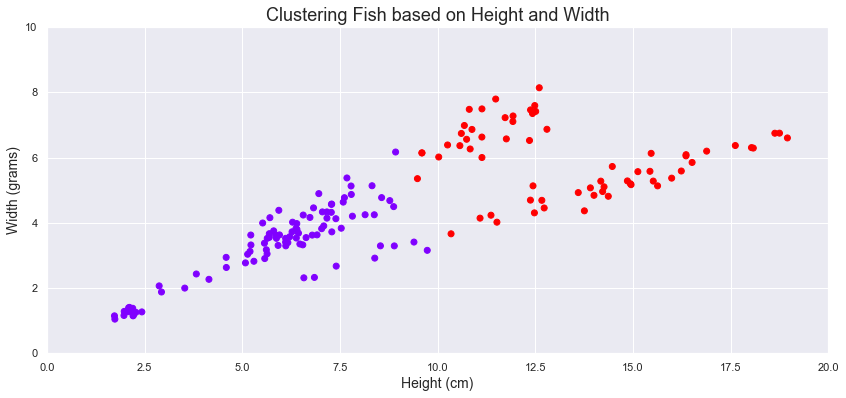

In [29]:
plt.figure(figsize = (14, 6))
plt.scatter(data_with_clusters['Height'], data_with_clusters['Width'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.title('Clustering Fish based on Height and Width', fontsize = 18)
plt.xlabel('Height (cm)', fontsize = 14)
plt.ylabel('Width (grams)', fontsize = 14)
plt.xlim(0, 20)
plt.ylim(0, 10)
plt.show()

# we can see that the k-means algorithm has clustered the fish mainly on height over width, indicating height is
# a better predictor than width for determining species

## Selecting the Number of Clusters to use

In [12]:
kmeans.inertia_

# Within Cluster Sum of Squares

979.1593582566032

In [13]:
wcss=[]

for i in range(1, 7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
# a way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS)
# WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids (local means)
# the code iterates the kmeans algorithm over the dataset for different numbers of clusters (1-6)
# the point is to minimise WCSS with as few clusters as possible.

In [14]:
wcss
# shows wcss for each cluster 1-6 below

[3351.7346510304383,
 979.1593582566032,
 618.3710784907714,
 319.69255207399306,
 240.22752591577483,
 175.14776154079178]

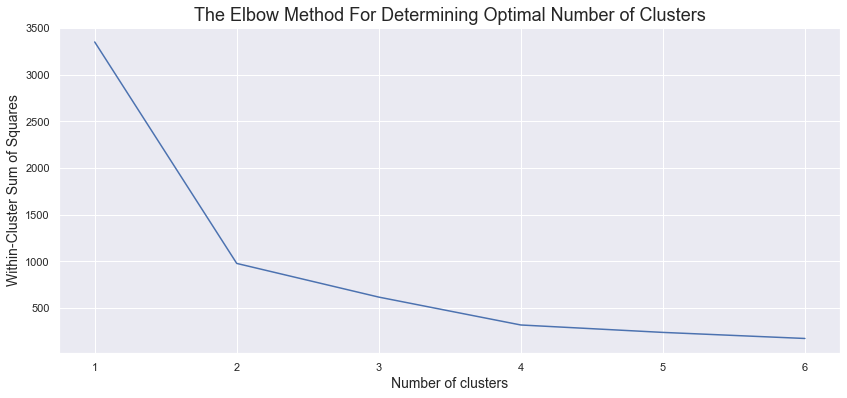

In [30]:
number_clusters = range(1,7)
plt.figure(figsize = (14, 6))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method For Determining Optimal Number of Clusters', fontsize = 18)
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('Within-Cluster Sum of Squares', fontsize = 14)
plt.show()

# using the matplotlib library to plot a graph of the elbow method.
# the elbow method is used to find the optimal number of clusters to put data in
# at 2 cluster iterations there is a large drop off in the reduction of the WCSS but 2 clusters aren't very useful
# between 2 and 4 clusters the reduction of WCSS remains constant
# at 4 cluster iterations, the WCSS reduction drastically decreases again. Any further than 4
# clusters doesn't provide any significant further reduction in the WCSS. Therefore the optimal number of clusters
# to use here is 4.

As the elbow method shows, the optimal number of clusters for this data is either 2 or 4
as this minimizes the difference between points in a cluster but maximises the difference between clusters.